# Proyek Analisis Data: PRSA_Data_Shunyi_20130301-20170228
- **Nama:** Furqon Taufiq Hidayat
- **Email:** furqontaufiqh@gmail.com
- **ID Dicoding:** furqonth

## Menentukan Pertanyaan Bisnis

- Di jam berapakah rata-rata konsentrasi PM10 di udara biasanya mencapai puncaknya?
- Bagaimana tren rata-rata PM10 bulanan sepanjang tahun 2015?
- Faktor apa saja yang mempengaruhi atau berkorelasi kuat dengan konsentrasi PM10?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
prsa_shunyi_df = pd.read_csv("/PRSA_Data_Shunyi_20130301-20170228.csv")
prsa_shunyi_df.head(15)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi
5,6,2013,3,1,5,11.0,11.0,3.0,7.0,200.0,45.0,-2.8,1028.2,-22.1,0.0,NNW,1.7,Shunyi
6,7,2013,3,1,6,12.0,12.0,3.0,9.0,300.0,74.0,-4.0,1029.0,-21.2,0.0,NNE,1.6,Shunyi
7,8,2013,3,1,7,13.0,13.0,3.0,23.0,300.0,59.0,-2.4,1030.5,-21.3,0.0,NE,1.7,Shunyi
8,9,2013,3,1,8,8.0,8.0,3.0,19.0,400.0,66.0,-1.0,1031.2,-21.8,0.0,NNW,2.7,Shunyi
9,10,2013,3,1,9,3.0,6.0,3.0,21.0,400.0,60.0,0.0,1031.3,-22.9,0.0,SSW,0.8,Shunyi


**Insight:**
- Terdapat data polutan yang tidak lengkap seperti SO2 di baris 3 serta CO dan O3 di baris 4
- Kecepatan angin (WSPM) cenderung turun seiring bertambahnya jam

### Assessing Data

In [3]:
prsa_shunyi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [4]:
prsa_shunyi_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,913
PM10,548
SO2,1296
NO2,1365
CO,2178


In [6]:
print("Jumlah duplikasi: ", prsa_shunyi_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
prsa_shunyi_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34151.000000,34516.000000,33768.000000,33699.000000,32886.000000,33575.000000,35013.000000,35013.000000,35010.000000,35013.000000,35020.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.491602,98.737026,13.572039,43.908865,1187.063979,55.201321,13.387969,1013.061938,2.465036,0.061094,1.807533
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.231739,89.143718,19.572068,30.996828,1156.374102,54.873726,11.483588,10.177339,13.726622,0.761668,1.287817
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,988.000000,-36.000000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,19.000000,31.000000,2.000000,19.000000,400.000000,10.000000,3.000000,1004.700000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,77.000000,5.000000,37.000000,800.000000,43.000000,14.400000,1012.700000,3.100000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,112.000000,138.000000,17.000000,62.000000,1500.000000,77.000000,23.200000,1021.000000,15.100000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,941.000000,999.000000,239.000000,258.000000,10000.000000,351.716400,40.600000,1042.800000,27.500000,37.300000,12.800000


**Insight:**
- Beberapa kolom memiliki jumlah missing value yang cukup banyak
- Tidak ada duplikasi data pada dataset

### Cleaning Data

In [11]:
#Untuk kolom polutan dan cuaca karena datanya cenderung berkesinambungan, maka saya menggunakan teknik interpolasi

prsa_shunyi_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'WSPM']] = prsa_shunyi_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'WSPM']].interpolate(method='linear')

In [12]:
#Untuk kolom RAIN data NA kemungkinan besar tidak ada hujan sehingga diisi dengan 0

prsa_shunyi_df['RAIN'] = prsa_shunyi_df['RAIN'].fillna(0)

In [13]:
#Untuk kolom WD menggunakan teknik imputasi dengan Mode (yang paling sering muncul)

prsa_shunyi_df['wd'] = prsa_shunyi_df['wd'].fillna(prsa_shunyi_df['wd'].mode()[0])

In [14]:
prsa_shunyi_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


In [15]:
prsa_shunyi_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.437962,99.271936,13.445971,44.094695,1197.904660,54.218810,13.375531,1013.071937,2.450821,0.061006,1.807784
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.500282,90.579040,19.463506,30.907747,1162.920922,54.592684,11.484913,10.177512,13.732520,0.761118,1.287542
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,988.000000,-36.000000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,19.000000,31.000000,2.000000,20.000000,400.000000,10.000000,3.000000,1004.700000,-8.900000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,77.000000,5.000000,37.000000,900.000000,42.000000,14.400000,1012.800000,3.100000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,139.000000,16.000000,62.000000,1500.000000,76.000000,23.200000,1021.000000,15.100000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,941.000000,999.000000,239.000000,258.000000,10000.000000,351.716400,40.600000,1042.800000,27.500000,37.300000,12.800000


In [24]:
prsa_shunyi_df.to_csv("main_data.csv", index=False)

**Insight:**
- Missing value pada beberapa kolom telah diisi dengan menggunakan teknik interpolasi linier, imputasi nilai konstan(0) dan juga imputasi dengan Mode
- Untuk beberapa kolom mungkin terjadi perubahan yang tidak signifikan pada mean karena data Missing Value sudah terisi

## Exploratory Data Analysis (EDA)

### Explore prsa_shunyi_df

In [16]:
prsa_shunyi_df.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
35032,35033,2017,2,27,16,89.0,89.0,20.0,80.0,1300.0,72.0,15.4,1014.4,-8.1,0.0,SW,3.0,Shunyi
25381,25382,2016,1,22,13,7.0,7.0,2.0,7.0,500.0,68.0,-9.3,1039.4,-29.9,0.0,WNW,5.1,Shunyi
31939,31940,2016,10,21,19,40.0,40.0,7.0,42.0,700.0,8.0,10.4,1014.6,9.8,3.2,NNW,1.3,Shunyi
7772,7773,2014,1,18,20,115.0,135.0,46.0,96.0,1700.0,7.0,0.9,1028.2,-11.5,0.0,SSE,2.6,Shunyi
25986,25987,2016,2,16,18,7.0,18.0,2.0,15.0,200.0,71.0,6.7,1019.3,-12.0,0.0,NW,4.3,Shunyi


In [19]:
# melihat rata-rata PM2.5, PM10, CO, dan TEMP perbulannya dari tahun 2013 s.d 2017

prsa_shunyi_df.groupby(by=["year", "month"]).agg({
    "PM2.5": "mean",
    "PM10": "mean",
    "CO": "mean",
    "TEMP": "mean"
})

PM2.5        PM10           CO       TEMP
year month                                                
2013 3      104.636425  127.721102  1388.592742   5.645161
     4       57.781250   83.029167  1016.790972  12.219722
     5       79.924059  125.364919  1008.179435  21.645161
     6      105.725000  112.927778  1326.121528  23.644167
     7       61.924731   68.613575  1279.198253  27.130511
     8       60.415323   70.002688  1118.704301  26.535484
     9       72.483333   92.050000  1218.325000  20.280278
     10      83.161290  108.051747  1118.548387  12.770027
     11      66.957639   88.156250  1203.472222   5.678611
     12      64.454301   75.391129  1733.266129  -0.208333
2014 1       93.642473  112.892473  1643.548387  -0.613710
     2      161.186756  155.152530  2001.264881  -0.348214
     3       97.760753  132.475806  1229.435484   9.652823
     4       87.926389  141.174306   906.597222  17.080833
     5       64.373790  109.691935   880.645161  21.746102
     6       55.820833   74.882639   704.166667  25.006806
     7       95.292473  113.213306   950.604839  28.156317
     8       62.567339   83.191263   796.639785  26.233468
     9       68.202778   83.513889   940.000000  20.295972
     10     108.215054  128.877016  1232.594086  13.518952
     11      81.267639  120.547083  1449.861111   5.730556
     12      51.856317   87.200941  1400.537634  -1.353898
2015 1       99.037366  108.825672  1715.188172  -1.241398
     2       91.833333  117.834821  1292.857143   0.957589
     3       87.923387  142.109409  1104.569892   8.353360
     4       74.112500  112.084653   735.555556  15.544444
     5       58.140457   84.109543   651.612903  21.203831
     6       64.653889   78.855278  1108.194444  24.247500
     7       62.158602   71.894489   777.217742  26.247581
     8       43.665995   61.059140   768.077957  26.007661
     9       48.625694   60.615278   724.930556  20.387500
     10      75.273522   90.004032   880.309140  13.809140
     11     116.900000  118.911111  1820.763889   3.078472
     12     155.458333  159.329973  2679.973118  -0.438710
2016 1       70.515457   77.614919  1388.911290  -4.618011
     2       49.274425   54.706178   860.704023   0.864799
     3       97.715726  121.430108  1197.177419   8.750538
     4       75.627778  109.309722   790.486111  16.272639
     5       56.848790   80.682796   834.475806  21.130376
     6       56.136111   65.042361   720.972222  25.093889
     7       63.694220   71.139113   822.244624  27.250672
     8       46.646505   58.489247   719.758065  27.130242
     9       54.666667   66.951389   682.638889  21.517679
     10      81.392473   95.995968  1027.419355  13.054089
     11      93.983333  123.058333  1753.194444   4.030278
     12     118.427419  130.388441  2371.370968  -0.170565
2017 1      117.868280  130.889785  2275.470430  -1.823124
     2       70.232143   80.240327  1252.083333   1.986161

In [21]:
# melihat rata-rata PM2.5 dan PM10, perjamnya

prsa_shunyi_df.groupby(by=["hour"]).agg({
    "PM2.5": "mean",
    "PM10": "mean",
})

,PM2.5,PM10
hour,,
0,93.994679,118.253369
1,91.150499,112.300723
2,87.262760,105.226472
3,83.141916,98.153504
4,79.469492,92.124045
5,76.089656,87.713158
6,72.451231,84.179889
7,70.648785,84.102608
8,71.177790,88.883530


**Insight:**
- Jika dilihat berdasarkan nilai rata-ratanya, korelasi antara PM2.5 dan PM10 kemungkinan cukup erat karena ketika PM2.5 naik angka PM10 juga cenderung ikut naik
- Berdasarkan rata-rata per-jam nya, angka PM2.5 dan PM10 cenderung tinggi di jam-jam midnight atau tengah malam

## Visualization & Explanatory Analysis

### Pertanyaan 1: Di jam berapakah rata-rata konsentrasi PM10 di udara biasanya mencapai puncaknya?

        PM10
hour        
00.00   97.0
01.00   90.0
02.00   85.0
03.00   77.0
04.00   72.0
05.00   69.0
06.00   64.0
07.00   62.0
08.00   68.0
09.00   69.0
10.00   68.0
11.00   68.0
12.00   63.0
13.00   59.0
14.00   62.0
15.00   63.0
16.00   65.0
17.00   68.0
18.00   77.0
19.00   86.0
20.00   94.0
21.00  102.0
22.00  105.0
23.00  102.0


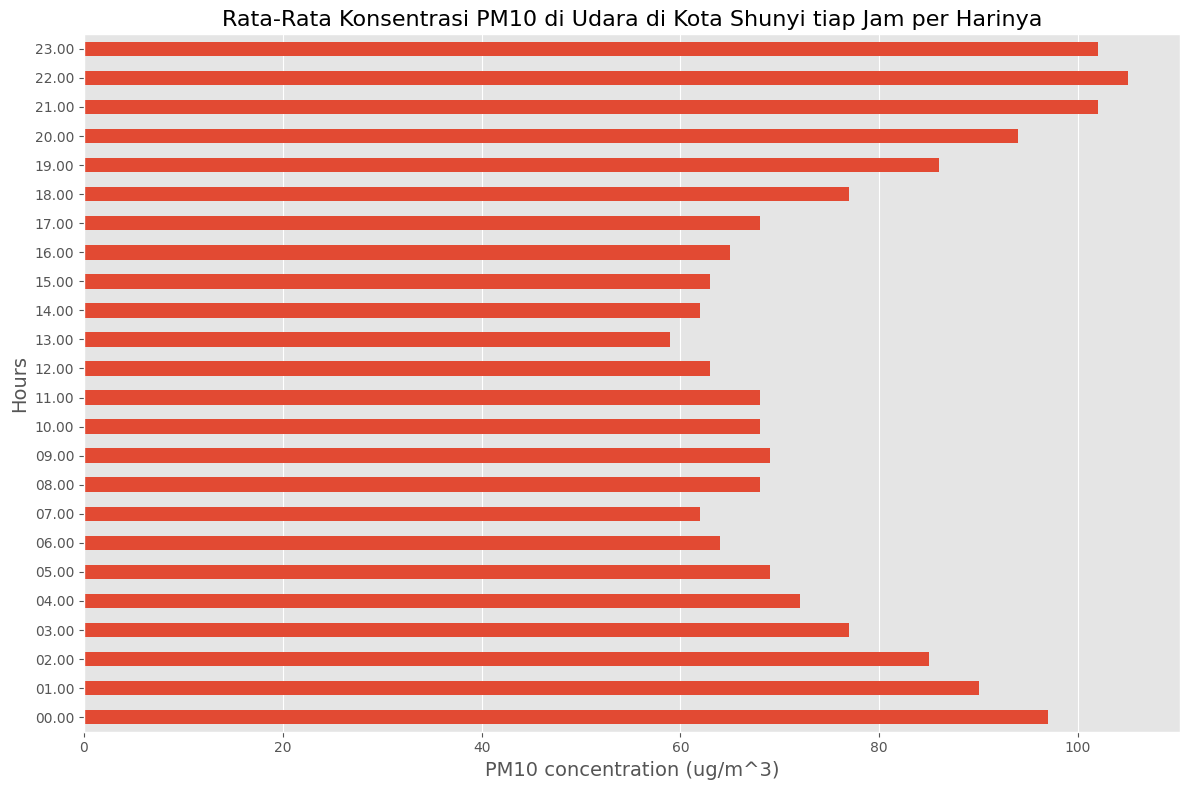

In [55]:
hourly_data = prsa_shunyi_df[['hour','PM10']]

hrs = ['00.00','01.00','02.00','03.00','04.00','05.00','06.00','07.00','08.00','09.00','10.00',
       '11.00','12.00','13.00','14.00','15.00','16.00','17.00','18.00','19.00',
       '20.00','21.00','22.00','23.00']

hour_dict = {}
for i,j in enumerate(hrs):
    hour_dict.setdefault(i,j)

hourly_data = hourly_data.groupby('hour').median().reset_index()
hourly_data.hour = hourly_data.hour.map(hour_dict)
hourly_data = hourly_data.set_index('hour')

print(hourly_data)

# mem-plot data
with plt.style.context('ggplot'):
    hourly_data.plot(figsize=(12,8),legend=False,kind='barh',linewidth=.9)
    plt.ylabel('Hours',fontsize=14)
    plt.xlabel('PM10 concentration (ug/m^3)',fontsize=14)
    plt.title('Rata-Rata Konsentrasi PM10 di Udara di Kota Shunyi tiap Jam per Harinya',fontsize=16)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

### Pertanyaan 2: Bagaimana tren rata-rata PM10 bulanan sepanjang tahun 2015?

            PM10
month           
January     93.0
February    79.5
March      124.0
April      102.0
May         75.0
June        64.0
July        65.0
August      40.0
September   41.0
October     57.0
November    94.0
December   119.0


/tmp/ipython-input-4280384214.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_data_2015.month = monthly_data_2015.month.map(map_dict)


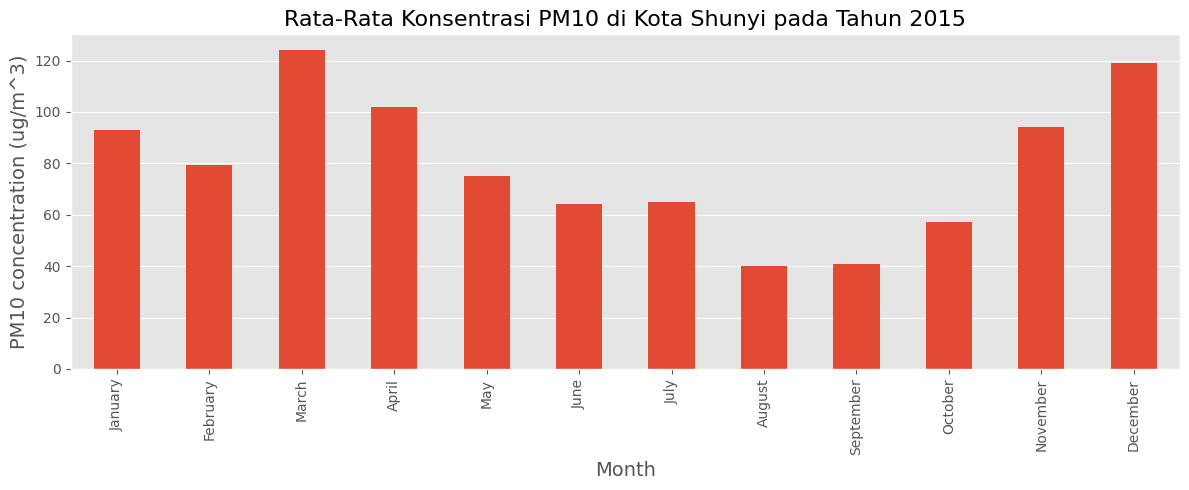

In [56]:
#mengambil data hanya di tahun 2015
prsa_shunyi_df['year'] = prsa_shunyi_df['year'].astype(int)
data_2015 = prsa_shunyi_df[prsa_shunyi_df['year'] == 2015]


monthly_data_2015 = data_2015[['month', 'PM10']]

months = ['January','February','March','April','May','June','July',
         'August','September','October','November','December']

ordered_monthdf = pd.DataFrame(months,columns=['month'])

map_dict = {}
for i,j in enumerate(months):
    map_dict.setdefault(i+1,j)

monthly_data_2015.month = monthly_data_2015.month.map(map_dict)

monthly_average = monthly_data_2015.groupby('month').median()
monthly_average = pd.merge(ordered_monthdf,monthly_average,left_on='month',right_index=True)
monthly_average = np.round(monthly_average,1)
monthly_average = monthly_average.set_index('month')

print(monthly_average)

# mem-plot data
with plt.style.context('ggplot'):
    monthly_average.plot(figsize=(12,5),legend=False,kind='bar',linewidth=.9)
    plt.xlabel('Month',fontsize=14)
    plt.ylabel('PM10 concentration (ug/m^3)',fontsize=14)
    plt.title('Rata-Rata Konsentrasi PM10 di Kota Shunyi pada Tahun 2015',fontsize=16)
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()

### Pertanyaan 3: Faktor apa saja yang mempengaruhi atau berkorelasi kuat dengan konsentrasi PM10?

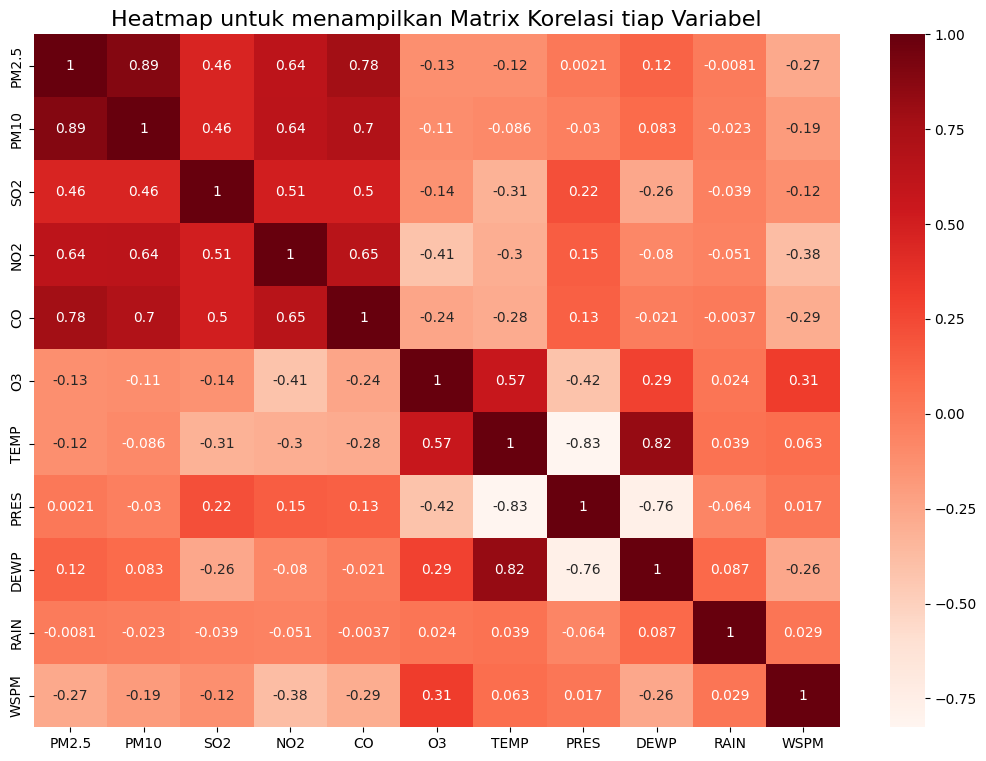

In [30]:
plt.figure(figsize=(13,9))

correlation_data = prsa_shunyi_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']]

sns.heatmap(correlation_data.corr(),cmap=plt.cm.Reds,annot=True)

plt.title('Heatmap untuk menampilkan Matrix Korelasi tiap Variabel',fontsize=16)
plt.show()

**Insight:**
- Bar Chart pertama menunjukkan rata-rata konsentrasi PM10 di Kota Shunyi setiap jamnya
- Bar Chart kedua menunjukkan rata-rata konsentrasi PM10 di Kota Shunyi setiap bulannya pada tahun 2015
- Heatmap menunjukkan korelasi pada setiap variabel data

## Analisis Lanjutan (Clustering)

###Feature Engineering & Selection

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# K-Means tidak bisa memproses data teks ('wd').
# Kita ubah 'wd' menjadi kolom-kolom biner (0 atau 1) menggunakan one-hot encoding
df_engineered = pd.get_dummies(prsa_shunyi_df, columns=['wd'])

# Memilih fitur untuk clustering
# Kita buang kolom non-informatif
features_to_drop = ['No', 'year', 'month', 'day', 'hour', 'station']
# Pastikan semua kolom ada sebelum di-drop
features_to_drop_existing = [col for col in features_to_drop if col in df_engineered.columns]
df_model = df_engineered.drop(columns=features_to_drop_existing)

# Simpan nama fitur untuk nanti
feature_names = df_model.columns

print(f"Feature engineering selesai. Jumlah fitur untuk model: {len(feature_names)}")
df_model.head()

Feature engineering selesai. Jumlah fitur untuk model: 28


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,...,wd_NNW,wd_NW,wd_S,wd_SE,wd_SSE,wd_SSW,wd_SW,wd_W,wd_WNW,wd_WSW
0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,...,False,True,False,False,False,False,False,False,False,False
1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,...,False,True,False,False,False,False,False,False,False,False
2,14.0,14.0,3.0,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,...,False,True,False,False,False,False,False,False,False,False
3,12.0,12.0,3.0,5.0,200.0,16.5,-2.1,1027.3,-23.3,0.0,...,False,True,False,False,False,False,False,False,False,False
4,12.0,12.0,3.0,6.0,200.0,11.0,-2.4,1027.7,-22.9,0.0,...,False,True,False,False,False,False,False,False,False,False


###Feature Scaling

In [48]:
# Menyamakan skala semua fitur (rata-rata 0, std dev 1)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_model)

print("Data telah di-scaling menggunakan StandardScaler.")

Data telah di-scaling menggunakan StandardScaler.


###Menemukan Jumlah Cluster (K) dengan Elbow Method

Memulai Elbow Method untuk mencari K optimal...
  Menghitung inertia untuk K=1... Selesai.
  Menghitung inertia untuk K=2... Selesai.
  Menghitung inertia untuk K=3... Selesai.
  Menghitung inertia untuk K=4... Selesai.
  Menghitung inertia untuk K=5... Selesai.
  Menghitung inertia untuk K=6... Selesai.
  Menghitung inertia untuk K=7... Selesai.
  Menghitung inertia untuk K=8... Selesai.
  Menghitung inertia untuk K=9... Selesai.
  Menghitung inertia untuk K=10... Selesai.


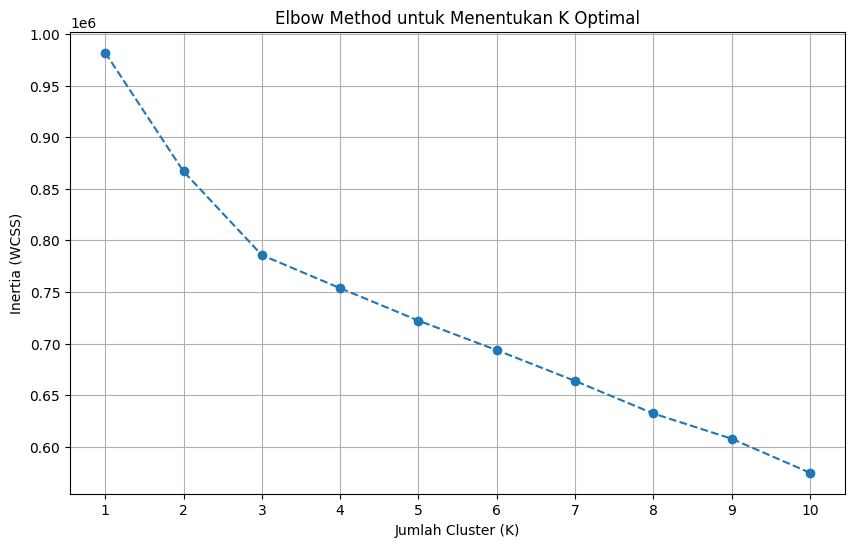

In [49]:
print("Memulai Elbow Method untuk mencari K optimal...")
inertia = []
k_range = range(1, 11) # Mencoba K dari 1 sampai 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)
    print(f"  Menghitung inertia untuk K={k}... Selesai.")

# Membuat plot
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method untuk Menentukan K Optimal')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Inertia (WCSS)')
plt.xticks(k_range)
plt.grid(True)

###Menjalankan K-Means Clustering

In [50]:
OPTIMAL_K = 3
print(f"Menjalankan K-Means Clustering dengan K={OPTIMAL_K}...")

# Jalankan model K-Means
kmeans_final = KMeans(n_clusters=OPTIMAL_K, init='k-means++', n_init=10, max_iter=300, random_state=42)
labels = kmeans_final.fit_predict(data_scaled)

# Tambahkan label cluster kembali ke DataFrame asli (yang belum di-scaling)
prsa_shunyi_df['cluster'] = labels

print("Clustering selesai. Label cluster telah ditambahkan ke DataFrame.")

Menjalankan K-Means Clustering dengan K=3...
Clustering selesai. Label cluster telah ditambahkan ke DataFrame.


###Interpretasi Hasil Cluster

In [51]:
print(f"\n--- Profil Rata-Rata untuk Setiap Cluster (K={OPTIMAL_K}) ---")

numeric_cols_to_interpolate = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'WSPM']

# Hitung rata-rata setiap fitur (kolom) untuk setiap cluster
# Kita gunakan df asli (sebelum one-hot encoding) agar lebih mudah dibaca
cluster_means = prsa_shunyi_df.groupby('cluster')[numeric_cols_to_interpolate].mean()

print(cluster_means)

# Menghitung jumlah anggota per cluster
print("\nDistribusi Data per Cluster:")
print(prsa_shunyi_df['cluster'].value_counts().sort_index())


--- Profil Rata-Rata untuk Setiap Cluster (K=3) ---
              PM2.5        PM10        SO2        NO2           CO         O3  \
cluster                                                                         
0         66.593011   85.715918   6.786413  34.459903   889.136849  79.655096   
1         29.965037   45.356664   8.815929  31.726396   649.221274  40.481079   
2        184.669306  212.969655  35.419037  84.673801  2734.470660  19.003669   

              TEMP         PRES       DEWP      WSPM  
cluster                                               
0        23.406340  1004.940307  13.953118  1.732328  
1         4.529039  1021.605340 -10.758215  2.327841  
2         4.804142  1017.909289  -2.626868  1.169225  

Distribusi Data per Cluster:
cluster
0    16325
1    11391
2     7348
Name: count, dtype: int64


###VISUALISASI HASIL CLUSTERING


Memulai pembuatan visualisasi cluster...
Menjalankan PCA untuk visualisasi 2D...


/tmp/ipython-input-3396075073.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=prsa_shunyi_df, x='cluster', palette='viridis')



Semua visualisasi selesai dibuat.


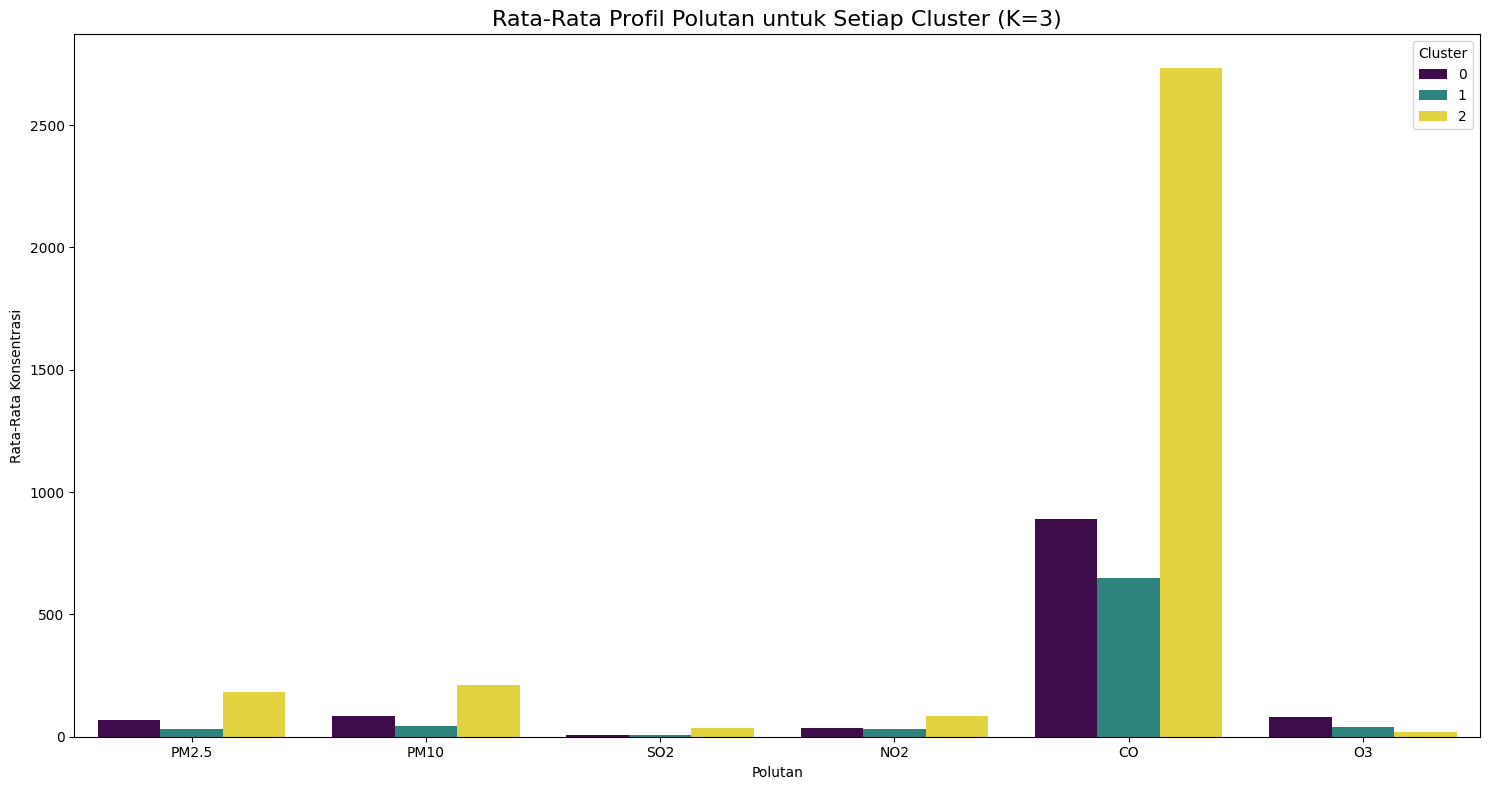

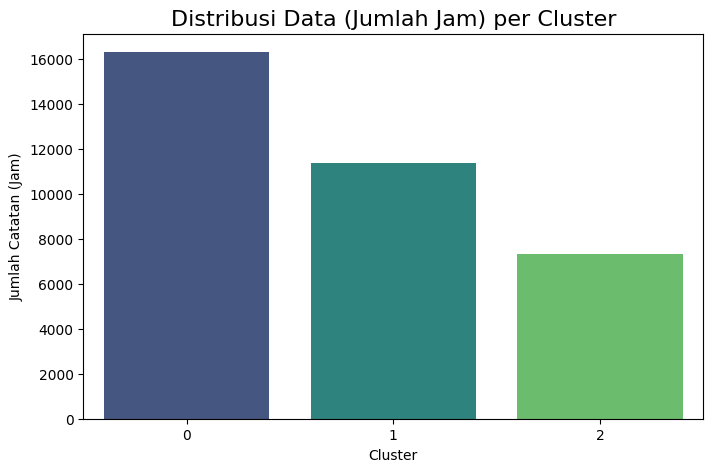

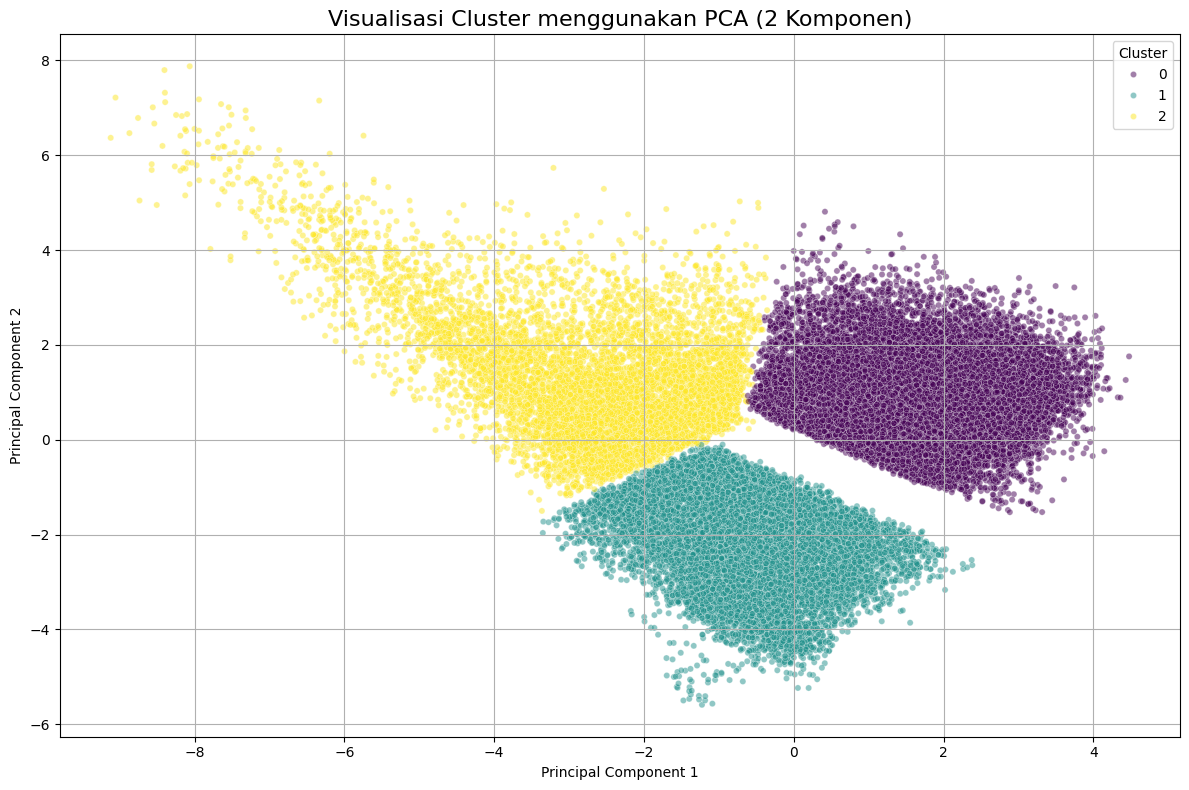

In [54]:
print("\nMemulai pembuatan visualisasi cluster...")

# --- Plot 1: Profil Cluster (Bar Chart) ---
# Ini adalah plot terpenting untuk interpretasi

# Kita hanya akan memplot polutan utama agar mudah dibaca
key_pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
profile_data_to_plot = cluster_means[key_pollutants]

# Kita perlu "melelehkan" (melt) dataframe agar ramah untuk seaborn
profile_data_to_plot = profile_data_to_plot.reset_index().melt(id_vars='cluster', var_name='Pollutant', value_name='Average Value')

plt.figure(figsize=(15, 8))
# Gunakan `catplot` (tipe 'bar') atau `barplot`
sns.barplot(data=profile_data_to_plot, x='Pollutant', y='Average Value', hue='cluster', palette='viridis')
plt.title(f'Rata-Rata Profil Polutan untuk Setiap Cluster (K={OPTIMAL_K})', fontsize=16)
plt.xlabel('Polutan')
plt.ylabel('Rata-Rata Konsentrasi')
plt.legend(title='Cluster', loc='upper right')
plt.tight_layout()


# --- Plot 2: Distribusi/Ukuran Cluster (Count Plot) ---
plt.figure(figsize=(8, 5))
sns.countplot(data=prsa_shunyi_df, x='cluster', palette='viridis')
plt.title('Distribusi Data (Jumlah Jam) per Cluster', fontsize=16)
plt.xlabel('Cluster')
plt.ylabel('Jumlah Catatan (Jam)')


# --- Plot 3: Sebaran Cluster (PCA Scatter Plot) ---
print("Menjalankan PCA untuk visualisasi 2D...")
pca = PCA(n_components=2)
data_scaled_pca = pca.fit_transform(data_scaled)

# Buat DataFrame baru untuk plotting
df_pca = pd.DataFrame(data_scaled_pca, columns=['PC1', 'PC2'])
# Pastikan index cocok untuk menggabungkan label cluster
df_pca['cluster'] = prsa_shunyi_df['cluster'].values

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='cluster', palette='viridis', alpha=0.5, s=20) # 's' adalah ukuran titik
plt.title('Visualisasi Cluster menggunakan PCA (2 Komponen)', fontsize=16)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()

print("\nSemua visualisasi selesai dibuat.")

## Conclusion

- Conclution pertanyaan 1 : Konsentrasi PM10 di Kota Shunyi tertinggi berada di jam 22.00 dengan rata-rata berada di 105.0 ug/m^3
- Conclution pertanyaan 2 : Angka PM10 di Kota Shunyi mencapai nilai tertinggi pada bulan Maret di tahun 2015 dengan rata-rata 124.0 ug/m^3.
- Conclution pertanyaan 3 : Berdasarkan heatmap, PM2.5 dan PM10 memiliki korelasi tertinggi yaitu 0.89, lalu PM10 dan CO dengan angka 0.7.